***
# <u><center>**Tarea Numérica**<center></u>
## <center>*Modelo social de interacción humanidad-naturaleza-desigualdad.*<center>
### <center>Estudiante: Andrés Calderón Guardia <br> RUT: 21.273.734-8 <br> Sección 7<center>
***


#### **Parte 0: Preámbulos de programación**
##### <u>1. Importación de las librerías</u>

Importamos las librerías requeridas para el desarrollo de la tarea:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

##### <u>2. Definición de constantes</u>

Definimos los valores de las constantes y las condiciones iniciales del problema *(antepondremos c_ a estas variables para identificar que son constantes a lo largo de todo el trabajo)*:

In [2]:
c_a_s = 10**(-2)
c_a_h = 7*10**(-2)
c_b_1 = 3*10**(-2)
c_b_2 = c_b_1
c_s = 5*10**(-4)
c_p = 5*10**(-3)
c_r = c_a_s
c_L = 10**2
c_x_c0 = c_L
c_y0 = c_L
c_a0 = 0

##### <u>3. Funciones</u>

Creamos las funciones para calcular los valores de $a_c, \, C_C, \, C_E, \, a_1, \, a_2$:

1. Función para calcular el valor $a_c$:

In [3]:
def a_c(args):
    p, x_c, k, x_e = args
    
    return p*(x_c+k*x_e)

2. Función para calcular el valor $C_C$:

In [4]:
def c_c(args):
    s, x_c, a, p, k, x_e = args

    #Cálculo de a_c
    args_a_c = [p, x_c, k, x_e]
    _a_c = a_c(args_a_c)
    
    return s*x_c*min(1, a/_a_c)

3. Función para calcular el valor $C_E$:

In [5]:
def c_e(args):
    s, x_c, a, p, k, x_e = args

    #Cálculo de a_c
    args_a_c = [p, x_c, k, x_e]
    _a_c = a_c(args_a_c)
    
    return k*s*x_e*min(1, a/_a_c)

4. Función para calcular el valor $a_1$:

In [6]:
def a_1(args):
    a_s, s, x_c, a, p, k, x_e, a_h = args

    #Cálculo de c_c
    args_c_c = [s, x_c, a, p, k, x_e]
    _c_c = c_c(args_c_c)
    
    return a_s+max(0, 1-_c_c/(s*x_c))*(a_h-a_s)

5. Función para calcular el valor $a_2$:

In [7]:
def a_2(args):
    a_s, s, x_c, a, p, k, x_e, a_h = args

    #Cálculo de c_e 
    args_c_e = [s, x_c, a, p, k, x_e]
    _c_e = c_e(args_c_e)
    
    return a_s+max(0, 1-_c_e/(s*x_e))*(a_h-a_s)

#### **Parte 1: Modelo simplificado a una EDO**
##### <u>1. Definición de parámetros</u>

Definimos un valor constante para las siguientes variables *(posponemos un número para indicar que estas variables pueden tener distintos valores constantes a lo largo del trabajo):*

In [8]:
p_x_e = 0
p_y = 50
p_a = 250

##### <u>2. Escribir la EDO resultante</u>

Dado que $x_e, \, y \, y \, a$ son constantes la única EDO relevante es la primera, es decir:
$$x'_C=b_1x_C-a_1x_C$$


##### <u>3. Resoluciones</u>

1. Método de Euler progresivo:

* Primero definimos las variables:

In [9]:
D1 = 1
k1 = 1
h1 = 1

* Ahora creamos la función del lado derecho:

In [10]:
#Esta función es autónoma así que omitiremos el parámetro del tiempo
def Fx_c(X, args):
    x_c = X
    b_1, a_s, s, a, p, k, x_e, a_h = args

    #Cálculo de a_1
    args_a_1 = [a_s, s, x_c, a, p, k, x_e, a_h]
    _a_1 = a_1(args_a_1)
    
    return x_c*(b_1-_a_1)

* E implementando el método se tiene:

In [11]:
def Euler_prog(F, ti, tf, X0, h, args):
    #Parámetros
    N = int((tf-ti)/h)
    I = np.linspace(ti, tf, N)
    X = np.zeros((N,1))
    X[0] = X0

    #Creación de la solución
    for i in range(N-1):
        X[i+1] = X[i] + h*F(X[i],args)

    return (I,X)

In [12]:
args_Fx_c = [c_b_1, c_a_s, c_s, p_a, c_p, k1, p_x_e, c_a_h]
I_EP, X_EP = Euler_prog(Fx_c, 0, 1000, c_x_c0, 1, args_Fx_c)

2. Método de Heun:

* Implementamos el método reutilizando los parámetros y funciones ya creados en el método anterior:

In [13]:
def Heun(F, ti, tf, X0, h, args):
    #Parámetros
    N = int((tf-ti)/h)
    I = np.linspace(ti, tf, N)
    X = np.zeros((N,1))
    X[0] = X0

    #Creación de la solución
    for i in range(N-1):
        X_tilda = X[i]+h*F(X[i],args)
        X[i+1] = X[i]+h/2*(F(X[i],args)+F(X_tilda,args))

    return (I,X)

In [14]:
I_H, X_H = Heun(Fx_c, 0, 1000, c_x_c0, 1, args_Fx_c)

3. Método de Runge Kutta 4:

* Implementamos el método reutilizando los parámetros y funciones ya creados anteriormente:

In [15]:
def RK4(F, ti, tf, X0, h, args):
    #Parámetros
    N = int((tf-ti)/h)
    I = np.linspace(ti, tf, N)
    X = np.zeros((N,1))
    X[0] = X0

    #Creación de la solución
    for i in range(N-1):
        g1 = F(X[i],args)
        g2 = F(X[i]+h/2*g1,args)
        g3 = F(X[i]+h/2*g2,args)
        g4 = F(X[i]+h*g3,args)

        X[i+1] = X[i]+h/6*(g1+2*g2+2*g3+g4)

    return (I,X)

In [16]:
I_RK4, X_RK4 = RK4(Fx_c, 0, 1000, c_x_c0, 1, args_Fx_c)

Por último graficamos estas tres funciones en un mismo gráfico:

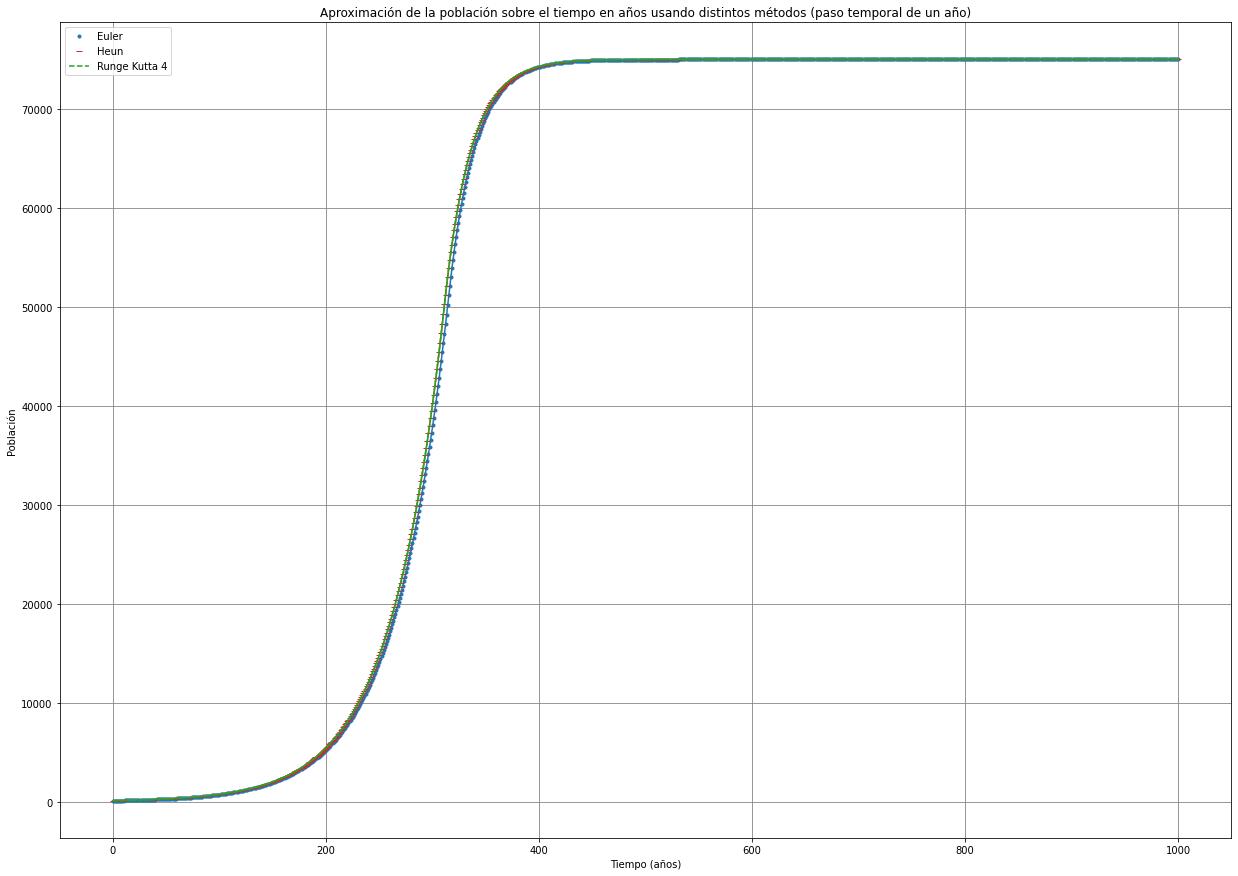

In [17]:
#Tamaño
plt.figure(figsize=(21,15))

#Método de Euler progresivo
plt.plot(I_EP,X_EP[:,0])
plt.plot(I_EP,X_EP[:,0], ".", label="Euler", color="tab:blue")

#Método de Heun
plt.plot(I_H,X_H[:,0])
plt.plot(I_H,X_H[:,0], "_", label="Heun", color="tab:red")

#Método de Runge Kutta 4
plt.plot(I_RK4,X_RK4[:,0])
plt.plot(I_RK4,X_RK4[:,0], "--", label="Runge Kutta 4", color="tab:green")

#Gráfico
plt.title("Aproximación de la población sobre el tiempo en años usando distintos métodos (paso temporal de un año)")

plt.xlabel("Tiempo (años)")
plt.ylabel("Población")

plt.grid(axis = "x", color="gray")
plt.grid(axis = "y", color="gray")

plt.legend()
plt.show()

##### <u>4. Errores asociados a los tres métodos</u>

1. Calcular las soluciones con un nuevo paso de $2^{-1}$ y $2^{-2}$ y graficamos:

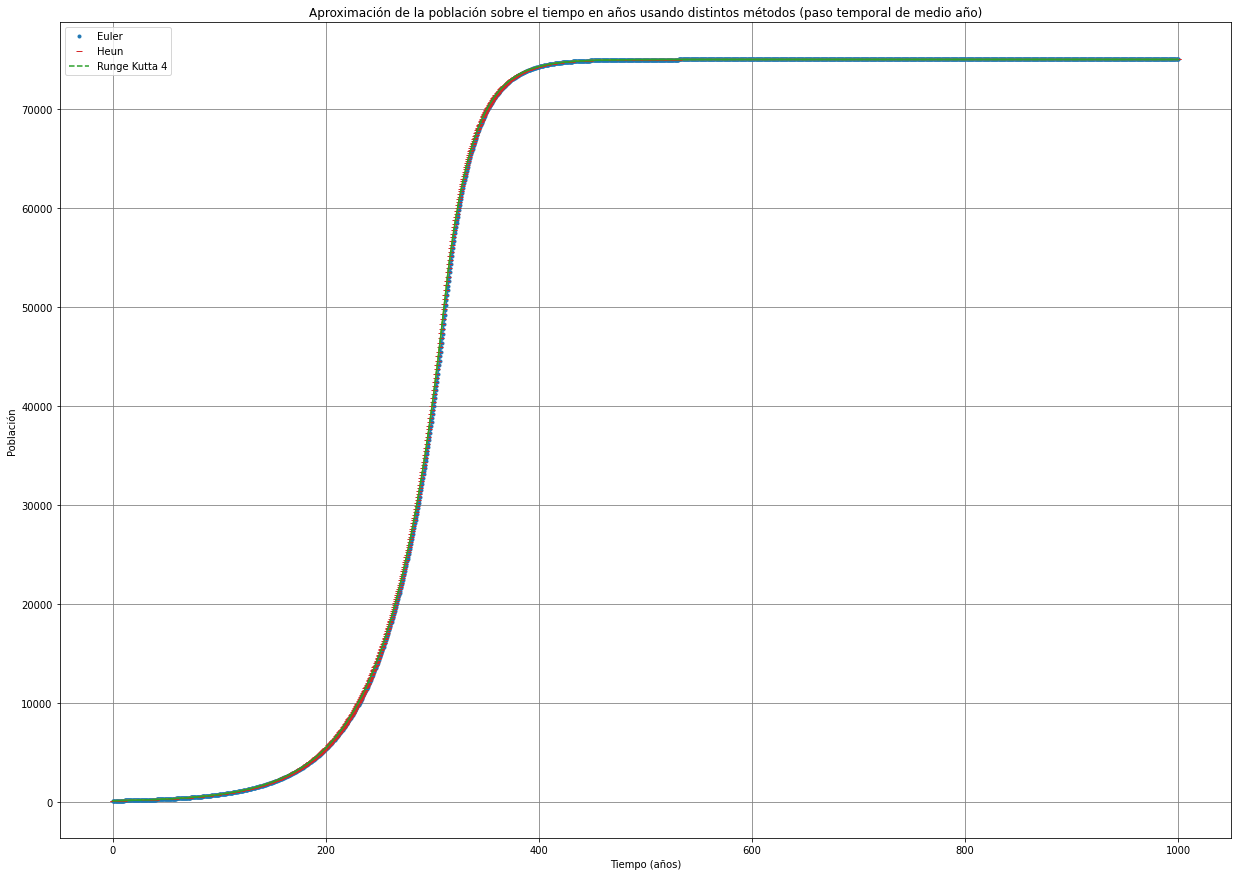

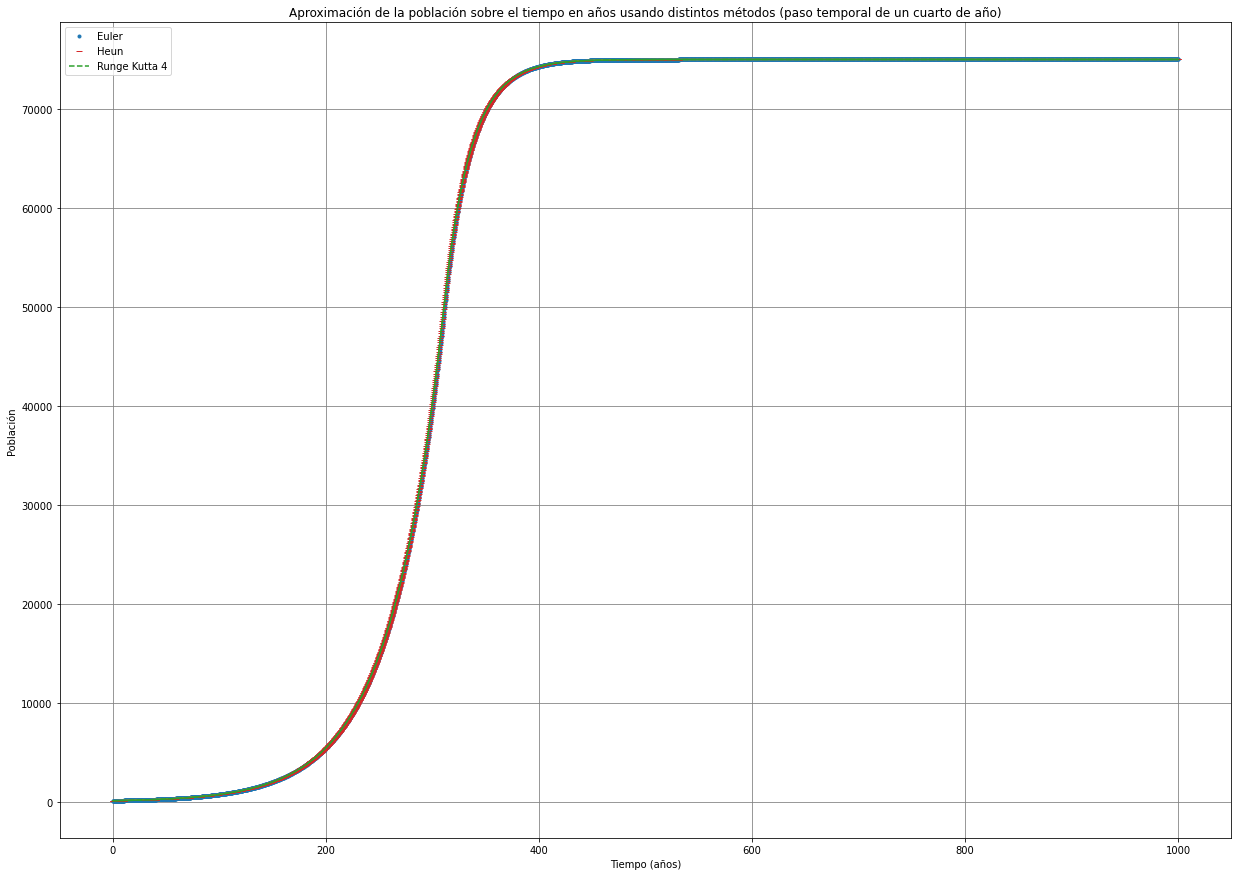

In [18]:
#Método de Euler progresivo
I2_EP, X2_EP = Euler_prog(Fx_c, 0, 1000, c_x_c0, 1/2, args_Fx_c)
I3_EP, X3_EP = Euler_prog(Fx_c, 0, 1000, c_x_c0, 1/4, args_Fx_c)   

#Método de Heun
I2_H, X2_H = Heun(Fx_c, 0, 1000, c_x_c0, 1/2, args_Fx_c)
I3_H, X3_H = Heun(Fx_c, 0, 1000, c_x_c0, 1/4, args_Fx_c)

#Método de Runge Kutta 4
I2_RK4, X2_RK4 = RK4(Fx_c, 0, 1000, c_x_c0, 1/2, args_Fx_c)
I3_RK4, X3_RK4 = RK4(Fx_c, 0, 1000, c_x_c0, 1/4, args_Fx_c)

#-----------------Gráfico de paso 1/2-----------------
plt.figure(figsize=(21,15))

#Método de Euler progresivo
plt.plot(I2_EP,X2_EP[:,0])
plt.plot(I2_EP,X2_EP[:,0], ".", label="Euler", color="tab:blue")

#Método de Heun
plt.plot(I2_H,X2_H[:,0])
plt.plot(I2_H,X2_H[:,0], "_", label="Heun", color="tab:red")

#Método de Runge Kutta 4
plt.plot(I2_RK4,X2_RK4[:,0])
plt.plot(I2_RK4,X2_RK4[:,0], "--", label="Runge Kutta 4", color="tab:green")

#Gráfico
plt.title("Aproximación de la población sobre el tiempo en años usando distintos métodos (paso temporal de medio año)")

plt.xlabel("Tiempo (años)")
plt.ylabel("Población")

plt.grid(axis = "x", color="gray")
plt.grid(axis = "y", color="gray")

plt.legend()
plt.show()

#-----------------Gráfico de paso 1/4-----------------
plt.figure(figsize=(21,15))

#Método de Euler progresivo
plt.plot(I3_EP,X3_EP[:,0])
plt.plot(I3_EP,X3_EP[:,0], ".", label="Euler", color="tab:blue")

#Método de Heun
plt.plot(I3_H,X3_H[:,0])
plt.plot(I3_H,X3_H[:,0], "_", label="Heun", color="tab:red")

#Método de Runge Kutta 4
plt.plot(I3_RK4,X3_RK4[:,0])
plt.plot(I3_RK4,X3_RK4[:,0], "--", label="Runge Kutta 4", color="tab:green")

#Gráfico
plt.title("Aproximación de la población sobre el tiempo en años usando distintos métodos (paso temporal de un cuarto de año)")

plt.xlabel("Tiempo (años)")
plt.ylabel("Población")

plt.grid(axis = "x", color="gray")
plt.grid(axis = "y", color="gray")

plt.legend()
plt.show()

2. Calcular una solución usando el método de Runge Kutta 4 con un paso de $h\cdot 2^{-8}$ ($\frac{1}{8}$):

In [19]:
IRef_RK4, XRef_RK4 = RK4(Fx_c, 0, 1000, c_x_c0, 2**(-8), args_Fx_c)

3. Conseguir la diferencia entre los tres métodos y el valor de referencia para calcular el error asociado:

In [20]:
#Cantidad de elementos en el valor de referencia
lenRef = len(XRef_RK4)

#Error asociado al método de Euler progresivo
EP1 = XRef_RK4[0:lenRef-1:256]
EP2 = XRef_RK4[0:lenRef-1:128]
EP3 = XRef_RK4[0:lenRef-1:64]

e_abs_EP1 = np.linalg.norm(EP1-X_EP)
e_abs_EP2 = np.linalg.norm(EP2-X2_EP)
e_abs_EP3 = np.linalg.norm(EP3-X3_EP)

#Error asociado al método de Heun
H1 = XRef_RK4[0:lenRef-1:256]
H2 = XRef_RK4[0:lenRef-1:128]
H3 = XRef_RK4[0:lenRef-1:64]

e_abs_H1 = np.linalg.norm(H1-X_H)
e_abs_H2 = np.linalg.norm(H2-X2_H)
e_abs_H3 = np.linalg.norm(H3-X3_H)

#Error asociado al método de Runge Kutta 4
RK4_1 = XRef_RK4[0:lenRef-1:256]
RK4_2 = XRef_RK4[0:lenRef-1:128]
RK4_3 = XRef_RK4[0:lenRef-1:64]

e_abs_RK4_1 = np.linalg.norm(RK4_1-X_RK4)
e_abs_RK4_2 = np.linalg.norm(RK4_2-X2_RK4)
e_abs_RK4_3 = np.linalg.norm(RK4_3-X3_RK4)

#Se muestran los resultados
print("Error Euler progresivo 1:", e_abs_EP1)
print("Error Euler progresivo 2:", e_abs_EP2)
print("Error Euler progresivo 3:", e_abs_EP3)
print("Error Heun 1:", e_abs_H1)
print("Error Heun 2:", e_abs_H2)
print("Error Heun 3:", e_abs_H3)
print("Error Runge Kutta 4 1:", e_abs_RK4_1)
print("Error Runge Kutta 4 2:", e_abs_RK4_2)
print("Error Runge Kutta 4 3:", e_abs_RK4_3)

Error Euler progresivo 1: 17502.430181173073
Error Euler progresivo 2: 12401.273927910253
Error Euler progresivo 3: 8774.169972965929
Error Heun 1: 140.44688915375048
Error Heun 2: 51.75469961154258
Error Heun 3: 16.603758272088434
Error Runge Kutta 4 1: 1.9030687270648974
Error Runge Kutta 4 2: 2.2059222478230436
Error Runge Kutta 4 3: 0.2663595094228291


##### <u>5. Conclusiones:</u>
Se puede evidenciar que el método de Euler progresivo, como era de esperar, es el que posee el mayor error pues usa tan solo una aproximación para formar sus soluciones, mientras que el método de Runge Kutta 4 tiene el menor error con diferencia de los tres métodos gracias a las cuatro aproximaciones que hace y el método de Heun mantiene su error entre ambos métodos. Y en general, para los tres métodos, como se esperaría, el error disminuye al usar un paso de menor tamaño.</br></br>
***


#### **Parte 2: Sociedad sin élites**
##### <u>1. Definición de parámetros:</u>

Imponemos un único parámetro fijo para esta parte de la tarea:

In [21]:
p1_x_e = 0

##### <u>2. Escribir las EDOs resultantes:</u>
Para esta parte solo se considera $x_e$ como una constante por lo que nos quedan las tres siguientes ecuaciones:
$$\begin{align*}
x'_C & =b_1x_C-a_1x_C \\
y' & =ry(L-y)-Dx_cy \\
a' & =Dx_cy-C_C-C_E
\end{align*}$$
Nótese que estas 3 ecuaciones son autónomas por lo que omitiremos el parámetro del tiempo en estas funciones.


##### <u>3. Crear función del lado derecho:</u>

Juntando estas 3 funciones de lado derecho en una sola tenemos:

In [22]:
def F1(t, X, args):
    #Parámetros
    x_c, y, a = X
    b_1, a_s, s, p, k, x_e, a_h, r, L, D = args

    #Cálculo de a_1, c_c y c_e
    args_a_1 = [a_s, s, x_c, a, p, k, x_e, a_h]
    args_c_c = [s, x_c, a, p, k, x_e]
    args_c_e = [s, x_c, a, p, k, x_e]
    _a_1 = a_1(args_a_1)
    _c_c = c_c(args_c_c)
    _c_e = c_e(args_c_e)

    #Ecuaciones del lado derecho
    _x_c = x_c*(b_1-_a_1)
    _y = y*(r*(L-y)-D*x_c)
    _a = D*x_c*y-_c_c-_c_e
    
    return np.array([_x_c,_y,_a])

##### <u>4. Demostración $\underline{\^D}$ es máximo:</u>
1. Definimos $e \,$:

In [23]:
e = (c_a_h-c_b_1)/(c_a_h-c_a_s)

2. Definimos el límite de carga de la naturaleza $\chi \,$:
$$\chi = \frac{r}{D}(L-e\frac{s}{D})$$
Que en código quedaría:

In [24]:
def Fchi(X, args):
    D = X
    r, L, e, s = args
    
    return r/D*(L-e*s/D)

3. Hallar $\^D$

* Esta función depende solamente de D pues el resto de parámetros son constantes, por lo que si queremos hallar el valor de $\^D$ primero derivaremos esta función respecto a D:
$$\begin{equation*}
\frac{\partial \chi}{\partial D}=\frac{\partial}{\partial D}\left(\frac{r}{D}\left(L-e\frac{s}{D}\right)\right)
=\frac{\partial}{\partial D}\left(\frac{rL}{D}-\frac{2res}{D^2}\right)
=\frac{2res}{D^3}-\frac{rL}{D^2}
\end{equation*}$$
* Igualamos a 0 y resolvemos para D para obtener los puntos críticos *(considerando que D es claramente distinto de 0)*:
$$\begin{align*}
\frac{2res}{D^3}-\frac{rL}{D^2} &=0 \qquad \qquad \qquad \qquad \qquad \\
\frac{2res}{D^3} &=\frac{rL}{D^2} \\
\frac{2es}{D^3} &=\frac{L}{D^2} \\
D^2 2es &=D^3L \\
D^3L-D^2 2es &=0 \\
D^2(DL-2es) &=0 \\
\Rightarrow DL-2es &=0 \\
DL &=2es \\
D &=\frac{2es}{L}
\end{align*}$$
* Y ahora calculamos la segunda derivada y la evaluamos en este punto a lo que debería entregar un valor negativo para comprobar que efectivamente este punto crítico se trata de un punto máximo:
$$\begin{align*}
\frac{\partial \chi}{\partial D}\left(\frac{2res}{D^3}-\frac{rL}{D^2}\right)
=-\frac{6res}{D^4}+\frac{2rL}{D^3}
=\frac{2rL}{D^3}-\frac{6res}{D^4}
\end{align*}$$
* Evaluando en el punto obtenido se tiene:
$$\begin{align*}
\frac{2rL}{\left(\frac{2es}{L}\right)^3}-\frac{6res}{\left(\frac{2es}{L}\right)^4}
=\frac{rL^4}{4\left(es\right)^3}-\frac{3rL^4}{8\left(es\right)^3}
=-\frac{L^4 \, r}{8\left(es\right)^3}
\end{align*}$$
* Y todas estas constantes tienen valor positivo *(incluyendo e que si se calcula es igual a $\frac{2}{3}$)*, por lo que junto al signo menos se concluye que este valor es negativo, y por ende, el punto crítico que se calculó es el valor que maximiza esta función y justamente corresponde con el $\^D$ que se nos pidió encontrar, por lo que queda demostrado.

##### <u>5. Demostración de la carga límite óptima ($\chi _M$):</u>
Para esto solamente reemplazamos el valor de $\^D$ en la ecuación de límite de carga natural quedando lo siguiente:
$$\begin{equation*}
\chi _M=\frac{rL}{\^D}-\frac{res}{\^D^2}
\end{equation*}$$
Nótese que $es$ puede escribirse como $\frac{\^DL}{2} \,$, por lo que al reemplazarlo queda:
$$\begin{align*}
\chi _M &=\frac{rL}{\^D}-\frac{r\^DL}{2\^D^2} \\
&=\frac{rL}{\^D}-\frac{rL}{2\^D} \\
&=\frac{rL}{2\^D}
\end{align*}$$
Que es justamente lo que debíamos encontrar.

Ahora definimos estos valores:

In [25]:
D_gorro = 2*e*c_s/c_L
k2 = 1

##### <u>6. Simulación:</u>
1. Gráfico normal:

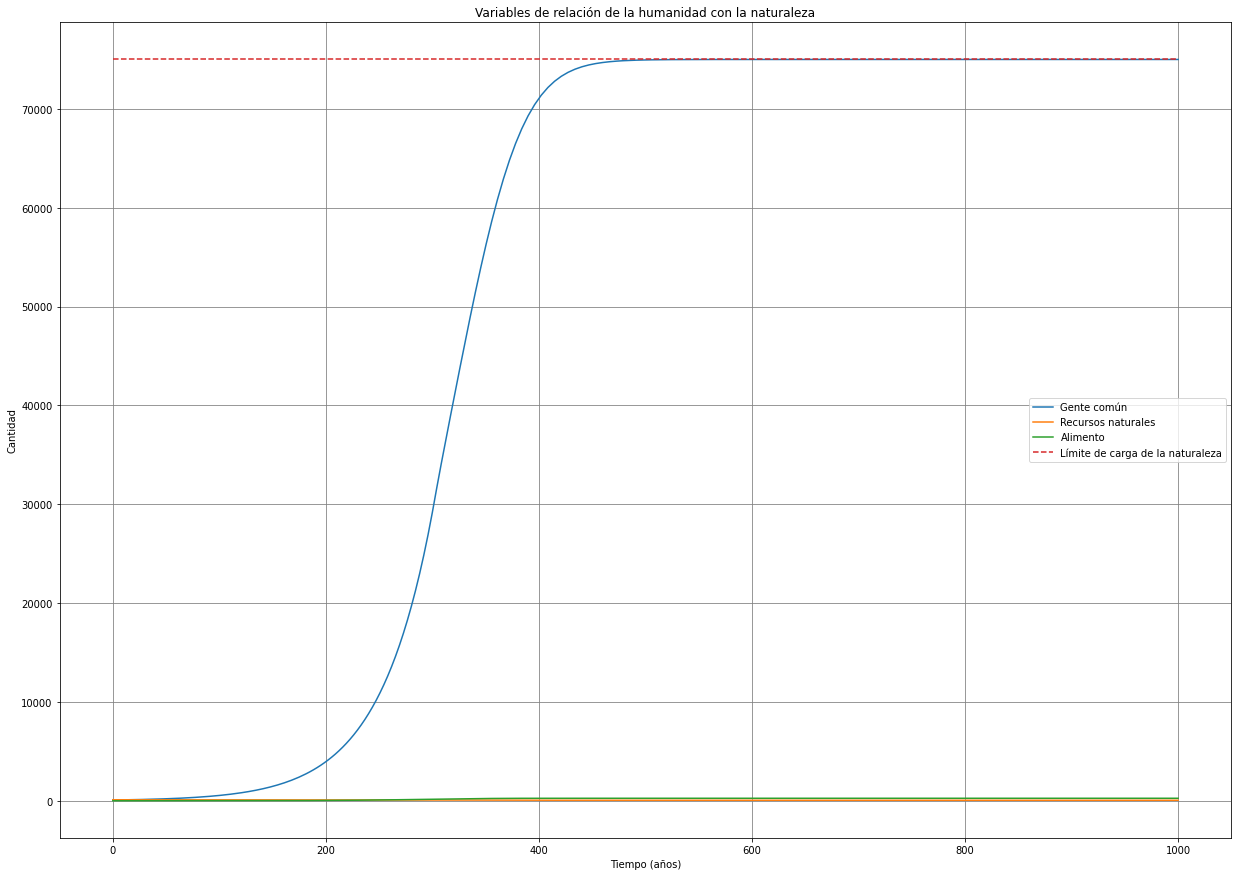

In [26]:
#Parámetros
X0 = [c_x_c0, c_y0, c_a0]
args = [c_b_1, c_a_s, c_s, c_p, k2, p1_x_e, c_a_h, c_r, c_L, D_gorro]
args_chi = [c_r, c_L, e, c_s]

#Creación de la solución
sol = solve_ivp(F1, (0,1000), X0, args = (args,))
I, X = sol["t"], sol["y"]
s_x_c, s_y, s_a = X[0], X[1], X[2]

#Valor de chi para el D utilizado
chi_max = Fchi(D_gorro, args_chi)
s_chi = np.ones(len(I))*chi_max

#Gráfico
plt.figure(figsize=(21,15))

plt.plot(I,s_x_c, label="Gente común")
plt.plot(I,s_y, label="Recursos naturales")
plt.plot(I,s_a, label="Alimento")
plt.plot(I,s_chi, "--", label="Límite de carga de la naturaleza")

plt.title("Variables de relación de la humanidad con la naturaleza")

plt.xlabel("Tiempo (años)")
plt.ylabel("Cantidad")

plt.grid(axis = "x", color="gray")
plt.grid(axis = "y", color="gray")

plt.legend()
plt.show()

2. Gráfico amplificado:

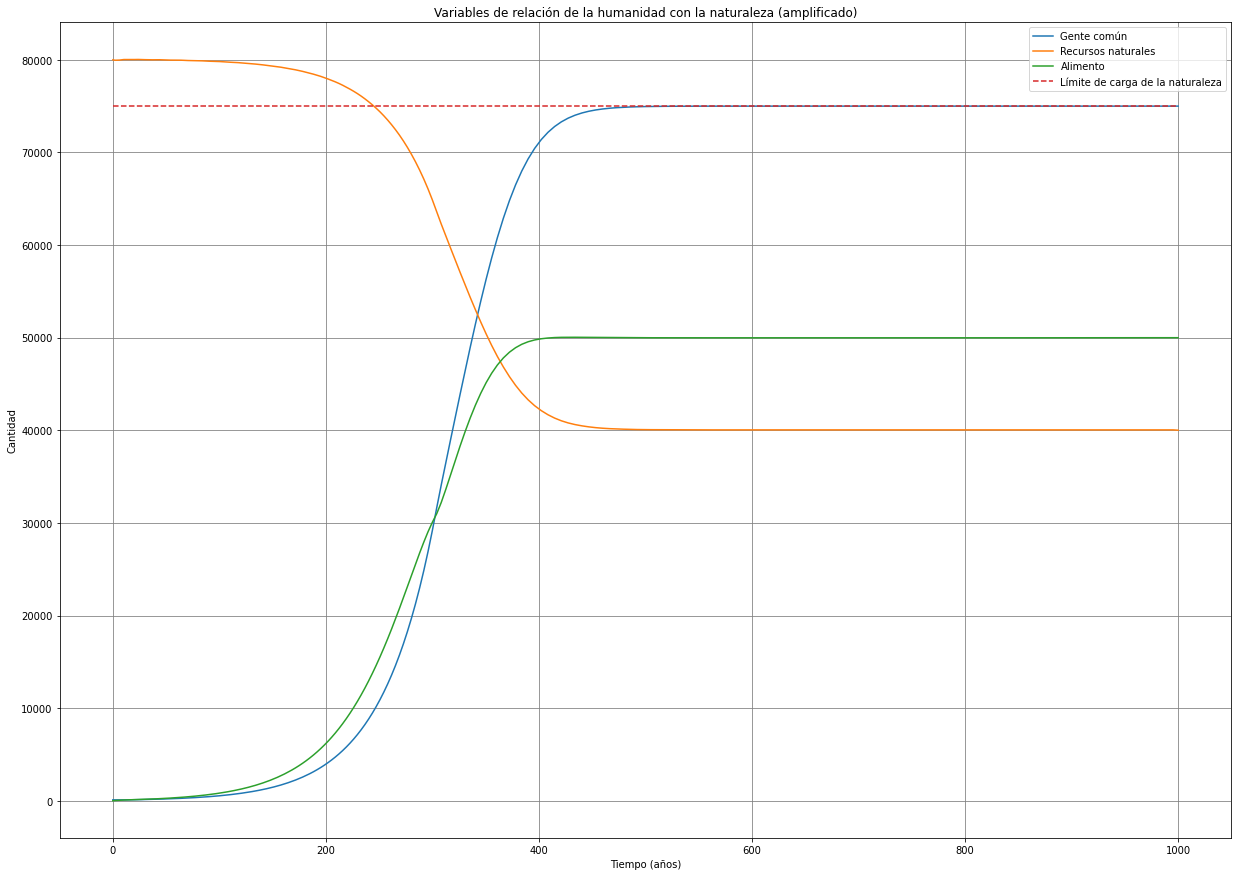

In [27]:
#Gráfico
plt.figure(figsize=(21,15))

plt.plot(I,s_x_c, label="Gente común")
plt.plot(I,8*c_L*s_y, label="Recursos naturales")
plt.plot(I,2*c_L*s_a, label="Alimento")
plt.plot(I,s_chi, "--", label="Límite de carga de la naturaleza")

plt.title("Variables de relación de la humanidad con la naturaleza (amplificado)")

plt.xlabel("Tiempo (años)")
plt.ylabel("Cantidad")

plt.grid(axis = "x", color="gray")
plt.grid(axis = "y", color="gray")

plt.legend()
plt.show()

3. Conclusiones

Del gráfico normal se puede evidenciar que la cantidad de personas comunes tiende a llegar al límite de carga que admite la naturaleza cuando hay depredación pero sin llegar a sobrepasarlo, lo que es un resultado lógico dado el significado de estas variables, y en cuanto al alimento y los recursos naturales, se ven que parecieran ser valores prácticamente constantes pero al amplificar sus valores en el gráfico amplificado, se puede ver la relación que tienen estos tres valores y es que al haber poco alimento en un inicio pero muchos recursos naturales disponibles se nota que estos recursos se van consumiendo a medida que el alimento sube hasta que cuando la cantidad de gente común se mantiene en un valor casi constante, estos dos valores también se estabilizan mostrando que estas cuatro curvas posen un sentido lógico.

Y cuando cambiamos el valor de la variable $k$ pude observar que el gráfico se mantenía invariante, lo cual es debido a que esta es una constante que representa el factor de desigualdad entre la gente común y la élite, pero para este caso la cantidad de gente de élite es nula, por lo que este parámetro al final no afecta al gráfico.


##### <u>7. Cambio de D:</u>
1. Definimos D como:

In [28]:
D_barra = 5.5*D_gorro

2. Resolver:

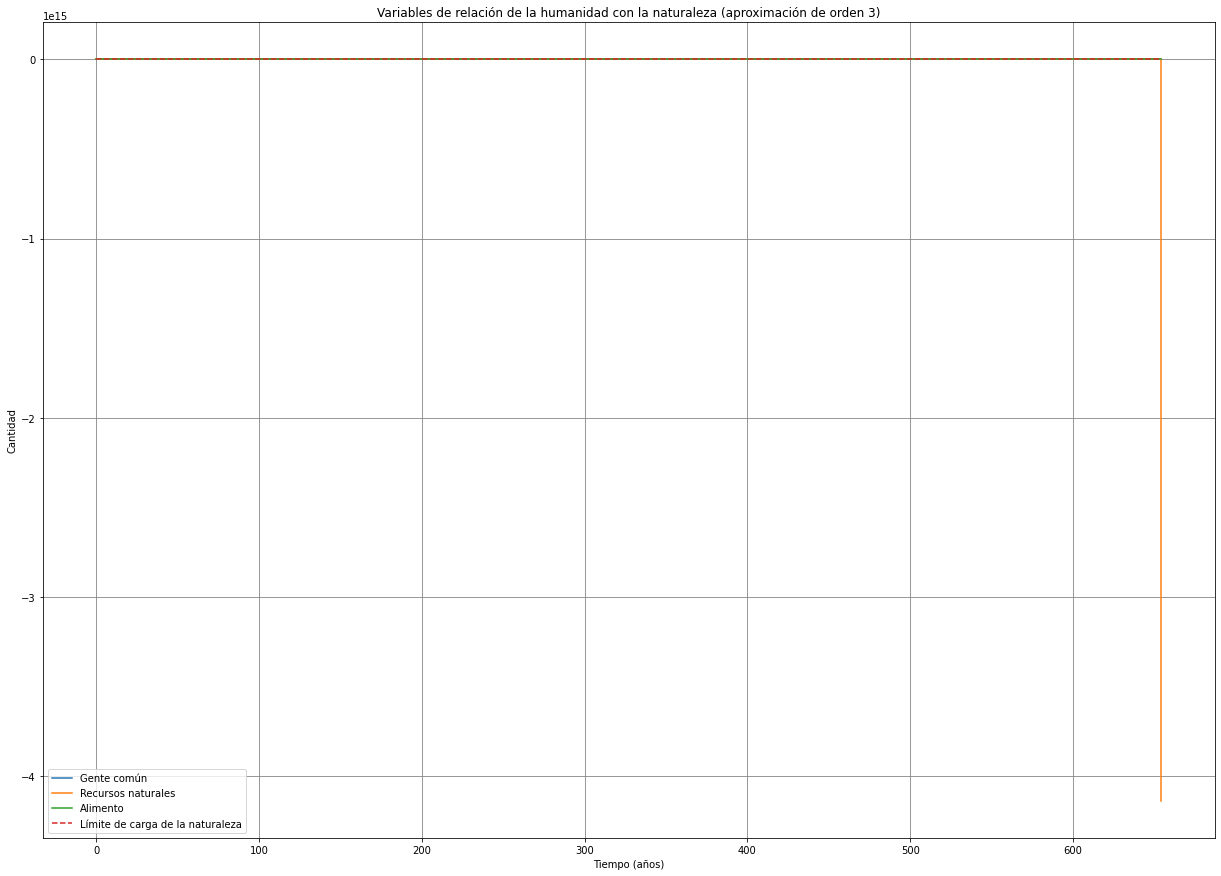

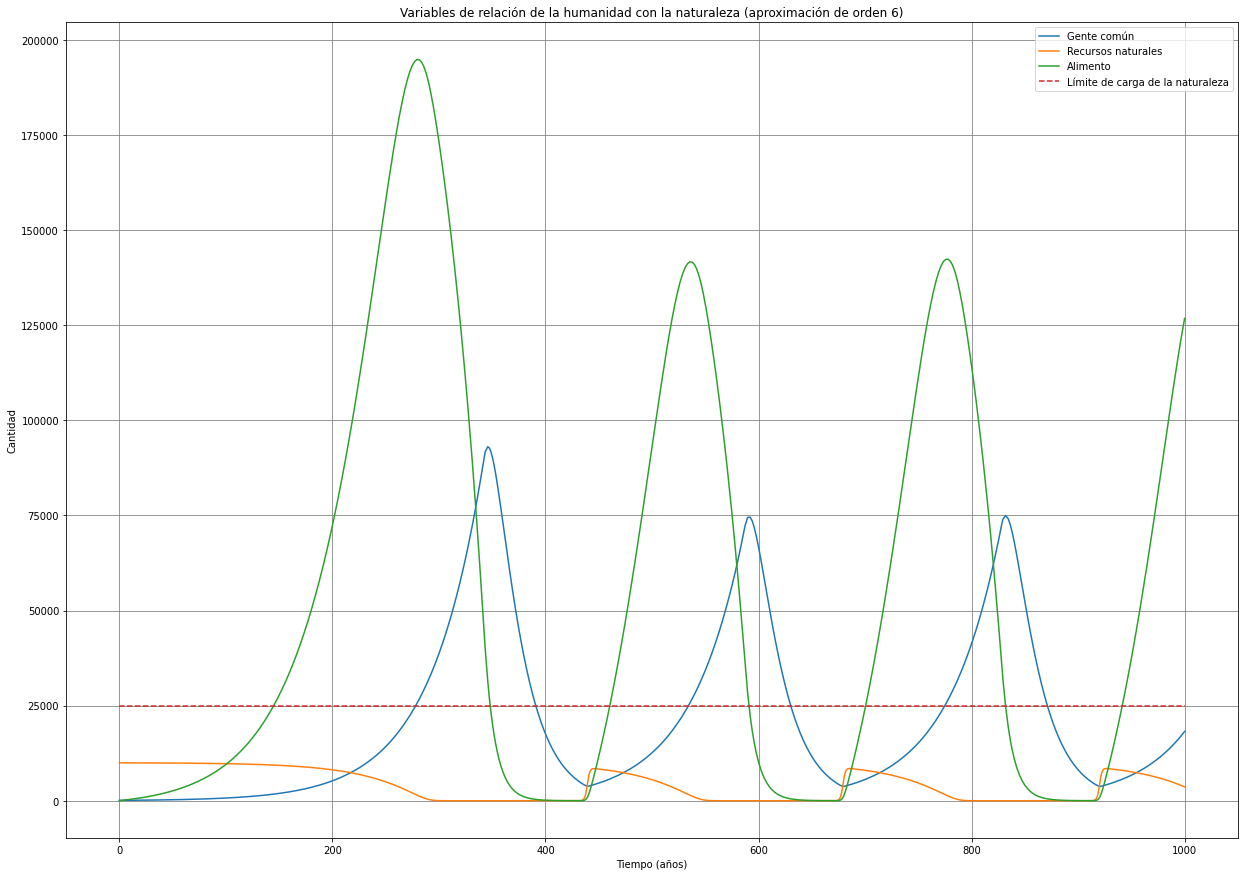

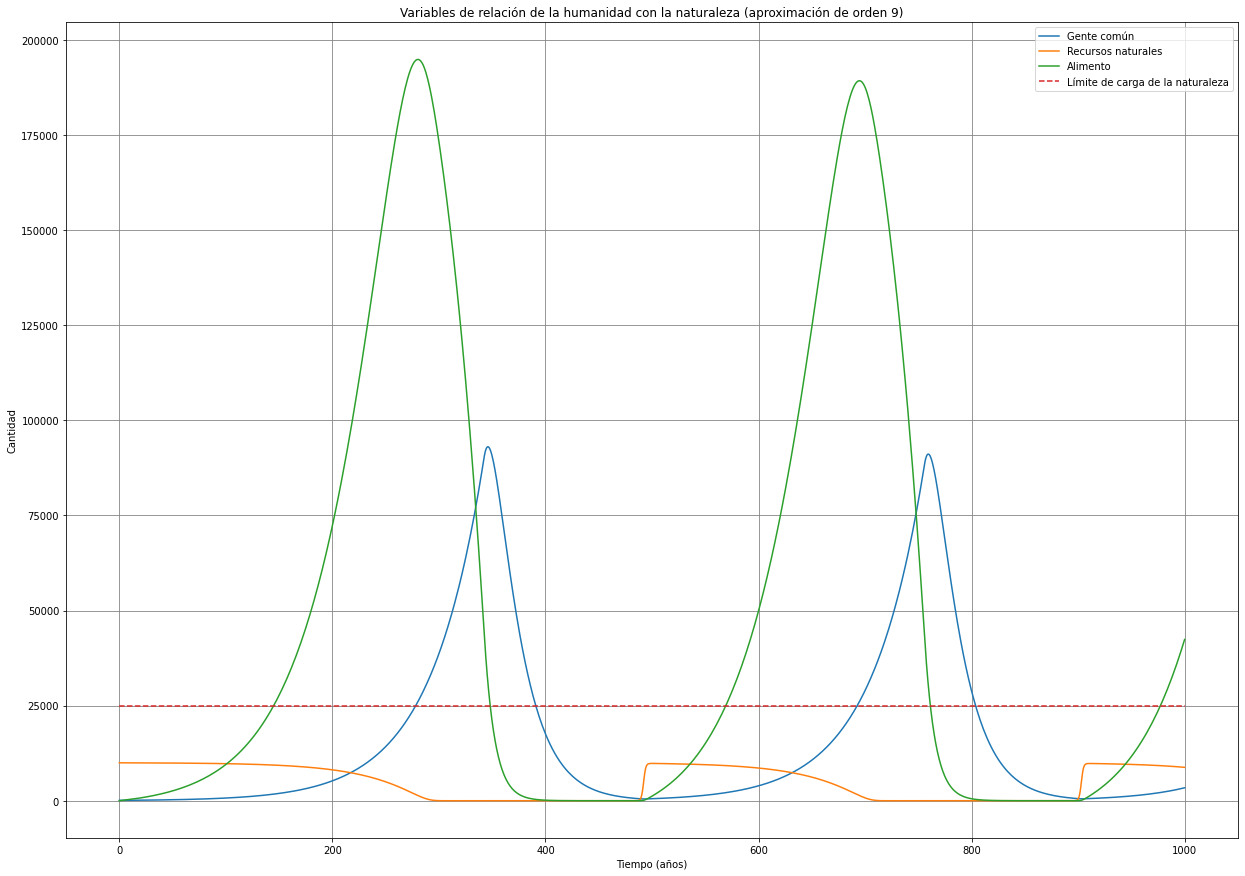

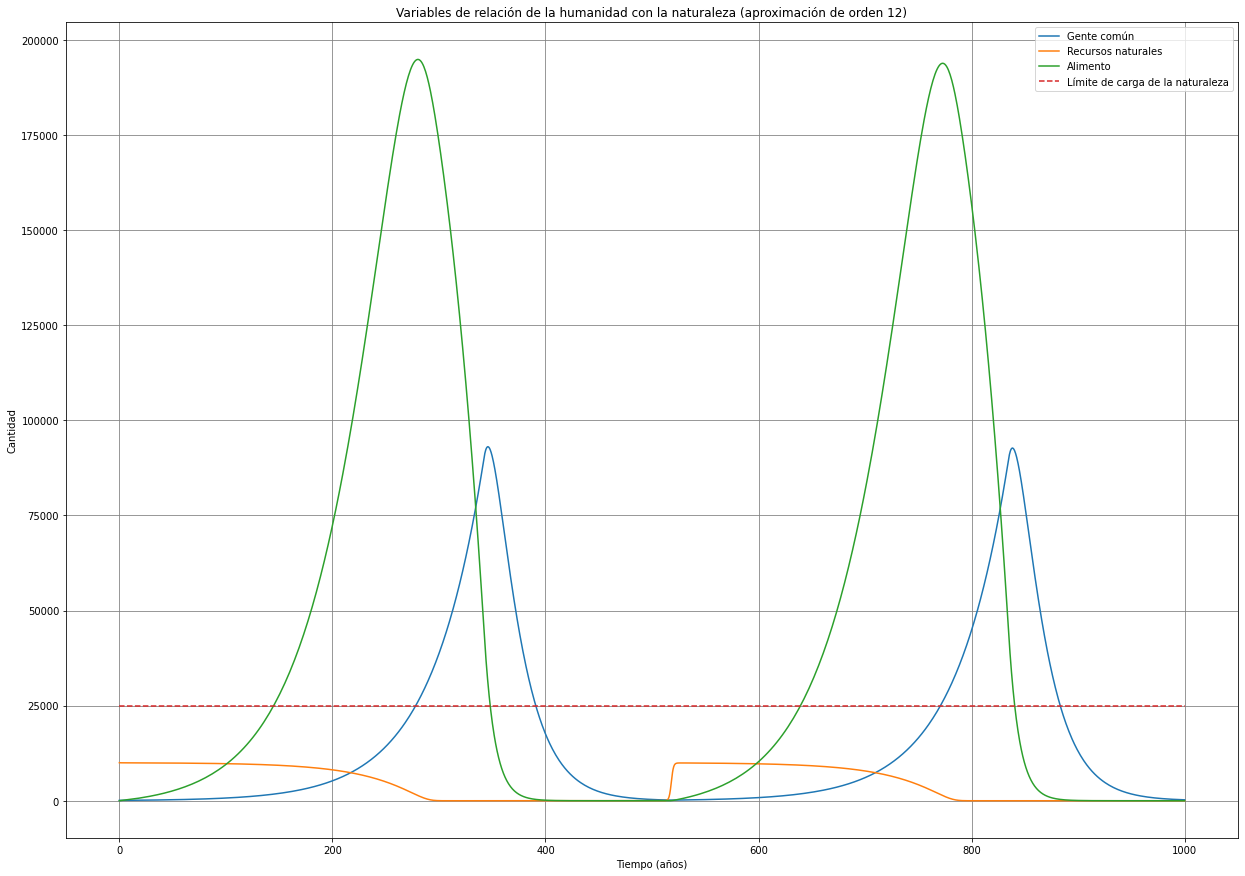

In [29]:
#Parámetros
args_barra = [c_b_1, c_a_s, c_s, c_p, k2, p1_x_e, c_a_h, c_r, c_L, D_barra]

#Creación de las soluciones
sol3 = solve_ivp(F1, (0,1000), X0, rtol=10**(-3), args = (args_barra,))
sol4 = solve_ivp(F1, (0,1000), X0, rtol=10**(-4), args = (args_barra,))
sol5 = solve_ivp(F1, (0,1000), X0, rtol=10**(-5), args = (args_barra,))
sol6 = solve_ivp(F1, (0,1000), X0, rtol=10**(-6), args = (args_barra,))
sol7 = solve_ivp(F1, (0,1000), X0, rtol=10**(-7), args = (args_barra,))
sol8 = solve_ivp(F1, (0,1000), X0, rtol=10**(-8), args = (args_barra,))
sol9 = solve_ivp(F1, (0,1000), X0, rtol=10**(-9), args = (args_barra,))
sol10 = solve_ivp(F1, (0,1000), X0, rtol=10**(-10), args = (args_barra,))
sol11 = solve_ivp(F1, (0,1000), X0, rtol=10**(-11), args = (args_barra,))
sol12 = solve_ivp(F1, (0,1000), X0, rtol=10**(-12), args = (args_barra,))

I3, X3 = sol3["t"], sol3["y"]
s3_x_c, s3_y, s3_a = X3[0], X3[1], X3[2]

I6, X6 = sol6["t"], sol6["y"]
s6_x_c, s6_y, s6_a = X6[0], X6[1], X6[2]

I9, X9 = sol9["t"], sol9["y"]
s9_x_c, s9_y, s9_a = X9[0], X9[1], X9[2]

I12, X12 = sol12["t"], sol12["y"]
s12_x_c, s12_y, s12_a = X12[0], X12[1], X12[2]

#Valor de chi para el D utilizado
chi_barra = Fchi(D_barra, args_chi)
s3_chi_barra = np.ones(len(I3))*chi_barra
s6_chi_barra = np.ones(len(I6))*chi_barra
s9_chi_barra = np.ones(len(I9))*chi_barra
s12_chi_barra = np.ones(len(I12))*chi_barra

#Gráfico de orden 3
plt.figure(figsize=(21,15))

plt.plot(I3,s3_x_c, label="Gente común")
plt.plot(I3,c_L*s3_y, label="Recursos naturales")
plt.plot(I3,c_L*s3_a, label="Alimento")
plt.plot(I3,s3_chi_barra, "--", label="Límite de carga de la naturaleza")

plt.title("Variables de relación de la humanidad con la naturaleza (aproximación de orden 3)")

plt.xlabel("Tiempo (años)")
plt.ylabel("Cantidad")

plt.grid(axis = "x", color="gray")
plt.grid(axis = "y", color="gray")

plt.legend()
plt.show()

#Gráfico de orden 6
plt.figure(figsize=(21,15))

plt.plot(I6,s6_x_c, label="Gente común")
plt.plot(I6,c_L*s6_y, label="Recursos naturales")
plt.plot(I6,c_L*s6_a, label="Alimento")
plt.plot(I6,s6_chi_barra, "--", label="Límite de carga de la naturaleza")

plt.title("Variables de relación de la humanidad con la naturaleza (aproximación de orden 6)")

plt.xlabel("Tiempo (años)")
plt.ylabel("Cantidad")

plt.grid(axis = "x", color="gray")
plt.grid(axis = "y", color="gray")

plt.legend()
plt.show()

#Gráfico de orden 9
plt.figure(figsize=(21,15))

plt.plot(I9,s9_x_c, label="Gente común")
plt.plot(I9,c_L*s9_y, label="Recursos naturales")
plt.plot(I9,c_L*s9_a, label="Alimento")
plt.plot(I9,s9_chi_barra, "--", label="Límite de carga de la naturaleza")

plt.title("Variables de relación de la humanidad con la naturaleza (aproximación de orden 9)")

plt.xlabel("Tiempo (años)")
plt.ylabel("Cantidad")

plt.grid(axis = "x", color="gray")
plt.grid(axis = "y", color="gray")

plt.legend()
plt.show()

#Gráfico de orden 12
plt.figure(figsize=(21,15))

plt.plot(I12,s12_x_c, label="Gente común")
plt.plot(I12,c_L*s12_y, label="Recursos naturales")
plt.plot(I12,c_L*s12_a, label="Alimento")
plt.plot(I12,s12_chi_barra, "--", label="Límite de carga de la naturaleza")

plt.title("Variables de relación de la humanidad con la naturaleza (aproximación de orden 12)")

plt.xlabel("Tiempo (años)")
plt.ylabel("Cantidad")

plt.grid(axis = "x", color="gray")
plt.grid(axis = "y", color="gray")

plt.legend()
plt.show()

En primer lugar observamos que con un *rtol* de orden 3 hay una anomalía en la que para el año aproximadamente 700, tanto el alimento como los recursos naturales terminan siendo valores negativos que aparentemente tienden a menos infinito, lo cual posiblemente sea un error dado que el gráfico no llega a los 1000 años por el hecho de llegar a este año y se quedase sin memoria tras tener que calcular valores tan grandes, lo que podría ser debido a la baja precisión que posee este orden en comparación a los de orden superior generando que de forma inesperada algún valor se volviese negativo rompiendo la lógica del problema, pero a medida que disminuimos el valor de *rtol* el gráfico pasa a evidenciar que entre medio de repente aparecen más de dos *peaks (como se observa en el segundo gráfico de orden 6)*, cuando lo normal está en dos al realizar todos los gráficos, esto es así posiblemente por el hecho de que las EDOs suelen depender de sus condiciones iniciales en gran medida, lo cual para este caso sería más bien la precisión de las soluciones, por el hecho de que al poseer distintos grados de exactitud los valores van a ir cambiando y esto puede afectar en bastante la forma de los gráficos, pero en su generalidad se ve una tendencia a converger al último gráfico, lo cual tiene sentido dado que la precisión de estos resultados van en aumento. Y respecto a lo que ocurre en los gráficos, se muestra que la población claramente sobrepasa este límite de carga de la naturaleza debido al cambio del valor de D pues este representa la tasa a la que la gente común utiliza los recursos naturales para producir alimentos, de este modo, como se aumentó bastante este parámetro en cuanto empieza a aumentar la gente estos recursos disminuyen hasta ser prácticamente nulos, pero a cambio de esto, obtienen muchísimos alimentos lo que provoca el alza exponencial en la población, pero dado esto implica que a su vez se consumirán muchos más alimentos por el aumento de gente, produciendo que tanto la comida como las personas disminuyan exponencialmente hasta ser prácticamente nulos, y como apenas hay gente, dada la ecuación que representa la cantidad de recursos disponibles, entre menos gente haya, estos recursos podrán regenerarse con más normalidad, volviendo al principio en el cual las personas empiezan a usar estos recursos para producir alimentos y entonces se vuelve a repetir este ciclo.</br></br>
***


#### **Parte 3: Sociedad igualitaria**
##### <u>1. Definición de parámetros:</u>

In [30]:
k3 = 1
x_e0 = 25
c_phi = x_e0/c_x_c0

##### <u>2. Escribir las EDOs resultantes:</u>
$$\begin{align*}
x'_C & =b_1x_C-a_1x_C \\
x'_E & =b_2x_E-a_2x_E \\
y' & =ry(L-y)-Dx_cy \\
a' & =Dx_cy-C_C-C_E
\end{align*}$$


##### <u>3. Función del lado derecho:</u>
Juntando estas 4 funciones de lado derecho se tiene:

In [31]:
def F2(t, X, args):
    #Parámetros
    x_c, x_e, y, a = X
    b_1, b_2, a_s, s, p, k, a_h, r, L, D = args

    #Cálculo de a_1, a_2 y c
    args_a = [a_s, s, x_c, a, p, k, x_e, a_h]
    args_c = [s, x_c, a, p, k, x_e]
    _a_1 = a_1(args_a)
    _a_2 = a_2(args_a)
    _c_c = c_c(args_c)
    _c_e = c_e(args_c)


    #Ecuaciones del lado derecho
    _x_c = x_c*(b_1-_a_1)
    _x_e = x_e*(b_2-_a_2)
    _y = y*(r*(L-y)-D*x_c)
    _a = D*x_c*y-_c_c-_c_e

    return np.array([_x_c,_x_e,_y,_a])

##### <u>4. Demostración $\underline{\~D}$ es máximo:</u>
1. Escribimos la nueva fórmula de carga límite de la naturaleza usando el $e$ de la parte anterior y el nuevo $\varphi$ que definimos en los parámetros:
$$\chi =\frac{r}{D}\left(L-e\frac{s}{D}(1+\varphi)\right)\left(1+\varphi\right)$$
En código quedaría:

In [32]:
def Fchi2(X, args):
    #Parámetros
    D = X
    r, L, e, s, phi = args
    
    return r/D*(L-e*s/D*(1+phi))*(1+phi)

2. Hallar $\~D \,$:
* Ahora para demostrar que $\~D$ es máximo usaremos el mismo método que con $\^D$, partiremos derivando la función:
$$\begin{equation*}
\frac{\partial \chi}{\partial D}=\frac{\partial}{\partial D}\left(\frac{r}{D}\left(L-e\frac{s}{D}\left(1+\varphi\right)\right)\left(1+\varphi\right)\right)
=\left(1+\varphi\right)\frac{\partial}{\partial D}\left(\frac{rL}{D}-\frac{2res\left(1+\varphi\right)}{D^2}\right)
=\frac{2res\left(1+\varphi\right)^2}{D^3}-\frac{rL\left(1+\varphi\right)}{D^2}
\end{equation*}$$

* Igualando a 0 y despejando D:
$$\begin{align*}
\frac{2res\left(1+\varphi\right)^2}{D^3}-\frac{rL\left(1+\varphi\right)}{D^2} &=0 \qquad \qquad \qquad \qquad \qquad \qquad \\
\frac{2res\left(1+\varphi\right)^2}{D^3} &=\frac{rL\left(1+\varphi\right)}{D^2} \\
\frac{2es\left(1+\varphi\right)}{D^3} &=\frac{L}{D^2} \\
D^2 2es\left(1+\varphi\right) &=D^3L \\
D^3L-D^2 2es\left(1+\varphi\right) &=0 \\
D^2(DL-2es\left(1+\varphi\right)) &=0 \\
\Rightarrow DL-2es\left(1+\varphi\right) &=0 \\
DL &=2es\left(1+\varphi\right) \\
D &=\frac{2es}{L}\left(1+\varphi\right)
\end{align*}$$
* Sabemos que es punto crítico por lo que ahora calculamos su segunda derivada y la evaluamos en este punto para demostrar que es máximo de esta función:
$$\begin{align*}
\frac{\partial \chi}{\partial D}\left(\frac{2res\left(1+\varphi\right)^2}{D^3}-\frac{rL\left(1+\varphi\right)}{D^2}\right)
=-\frac{6res\left(1+\varphi\right)^2}{D^4}+\frac{2rL\left(1+\varphi\right)}{D^3}
=\frac{2rL\left(1+\varphi\right)}{D^3}-\frac{6res\left(1+\varphi\right)^2}{D^4}
\end{align*}$$
* Evaluando en el punto obtenido se tiene:
$$\begin{align*}
\frac{2rL\left(1+\varphi\right)}{\left(\frac{2es\left(1+\varphi\right)}{L}\right)^3}-\frac{6res\left(1+\varphi\right)^2}{\left(\frac{2es\left(1+\varphi\right)}{L}\right)^4}
=\frac{rL^4}{4\left(es\right)^3\left(1+\varphi\right)^2}-\frac{3rL^4}{8\left(es\right)^3\left(1+\varphi\right)^2}
=-\frac{L^4 \, r}{8\left(es\right)^3\left(1+\varphi\right)^2}
\end{align*}$$
* Y de nuevo se tiene que todas las componentes de esta expresión son positivas por lo que al tomarle signo negativo se tiene que este valor es negativo y que por lo tanto $\~D$ es efectivamente máximo de esta función.

##### <u>5. Demostración de la carga límite óptima ($\chi _M$):</u>
Reemplazamos el valor de $\~D$ en la nueva ecuación de límite de carga natural quedando lo siguiente:
$$\begin{equation*}
\chi _M=\frac{rL\left(1+\varphi\right)}{\~D}-\frac{res\left(1+\varphi\right)^2}{\~D^2}
\end{equation*}$$
Nótese que $es$ en este caso puede escribirse como $\frac{\~DL}{2\left(1+\varphi\right)} \,$, por lo que al reemplazarlo queda:
$$\begin{align*}
\chi _M &=\frac{rL\left(1+\varphi\right)}{\~D}-\frac{r\~DL\left(1+\varphi\right)^2}{2\~D^2\left(1+\varphi\right)} \\
&=\frac{rL\left(1+\varphi\right)}{\~D}-\frac{rL\left(1+\varphi\right)}{2\~D} \\
&=\left(1+\varphi\right)\frac{rL}{2\~D}
\end{align*}$$
Que es justamente lo que debíamos encontrar.

##### <u>6. Soluciones:</u>
1. Gráfico $\left(con \; \~D \,\right)$:

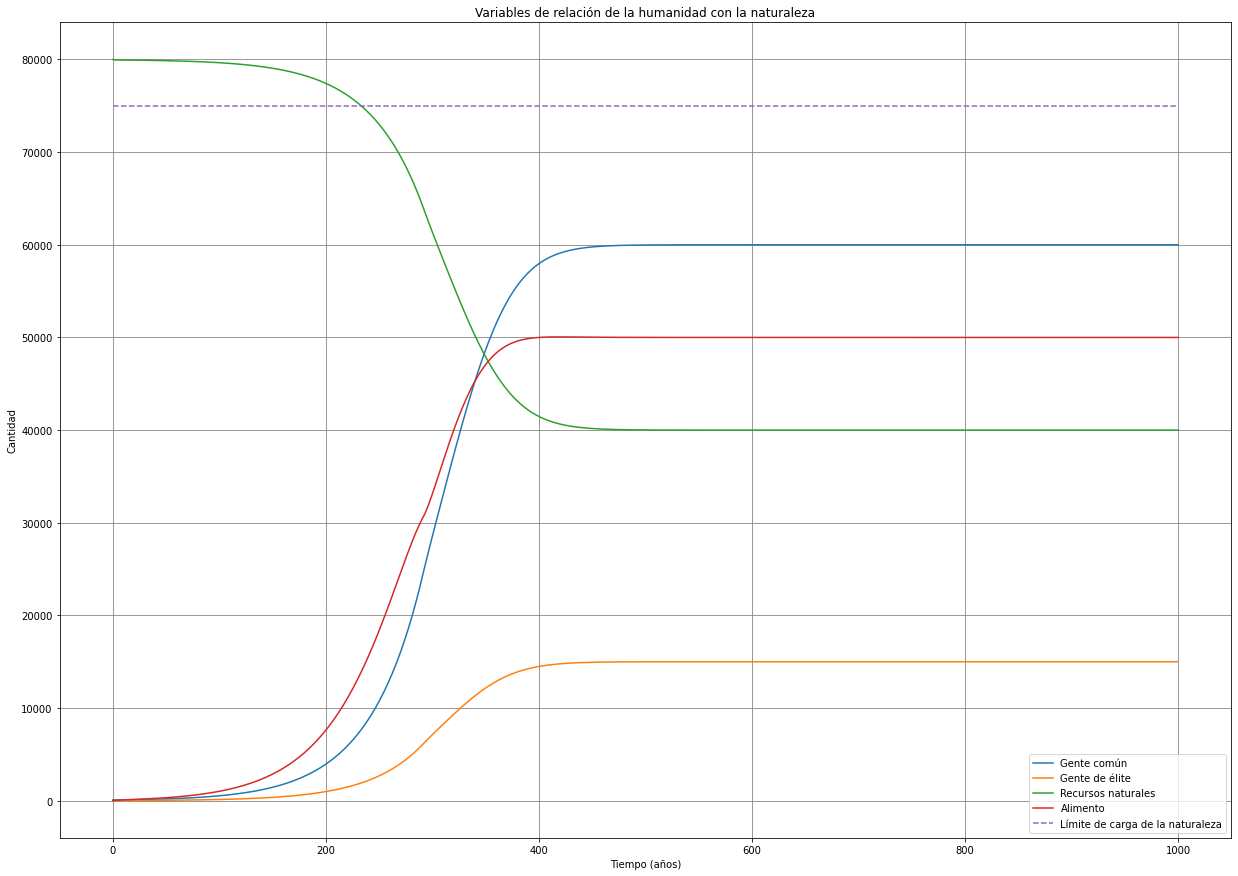

In [33]:
#Parámetros
D_cremilla = D_gorro*(1+c_phi)
X0_cremilla = [c_x_c0, x_e0, c_y0, c_a0]
args_cremilla = [c_b_1, c_b_2, c_a_s, c_s, c_p, k3, c_a_h, c_r, c_L, D_cremilla]
args_chi_p3 = [c_r, c_L, e, c_s, c_phi]

#Solución
sol_p3 = solve_ivp(F2, (0,1000), X0_cremilla, rtol=10**(-12), args = (args_cremilla,))

#Gráfico
IP3, XP3 = sol_p3["t"], sol_p3["y"]
sp3_x_c, sp3_x_e, sp3_y, sp3_a = XP3[0], XP3[1], XP3[2], XP3[3]

#Valor de chi para el D utilizado
chi_max_p3 = Fchi2(D_cremilla, args_chi_p3)
sp3_chi = np.ones(len(IP3))*chi_max_p3

#Gráfico
plt.figure(figsize=(21,15))

plt.plot(IP3,sp3_x_c, label="Gente común")
plt.plot(IP3,sp3_x_e, label="Gente de élite")
plt.plot(IP3,8*c_L*sp3_y, label="Recursos naturales")
plt.plot(IP3,2*c_L*sp3_a, label="Alimento")
plt.plot(IP3,sp3_chi, "--", label="Límite de carga de la naturaleza")

plt.title("Variables de relación de la humanidad con la naturaleza")

plt.xlabel("Tiempo (años)")
plt.ylabel("Cantidad")

plt.grid(axis = "x", color="gray")
plt.grid(axis = "y", color="gray")

plt.legend()
plt.show()

2. Descripción $\left(con \; \~D \,\right)$:

Ocurre algo muy similar al caso anterior donde no habían élites, en el cual tras cierto tiempo todas las curvas se estabilizaban, solo que ahora hay una curva que considera la cantidad de gente de élite aunque son bastantes menos en comparación a la gente común.

3. Gráfico $\left(con \; 5\~D \,\right)$:

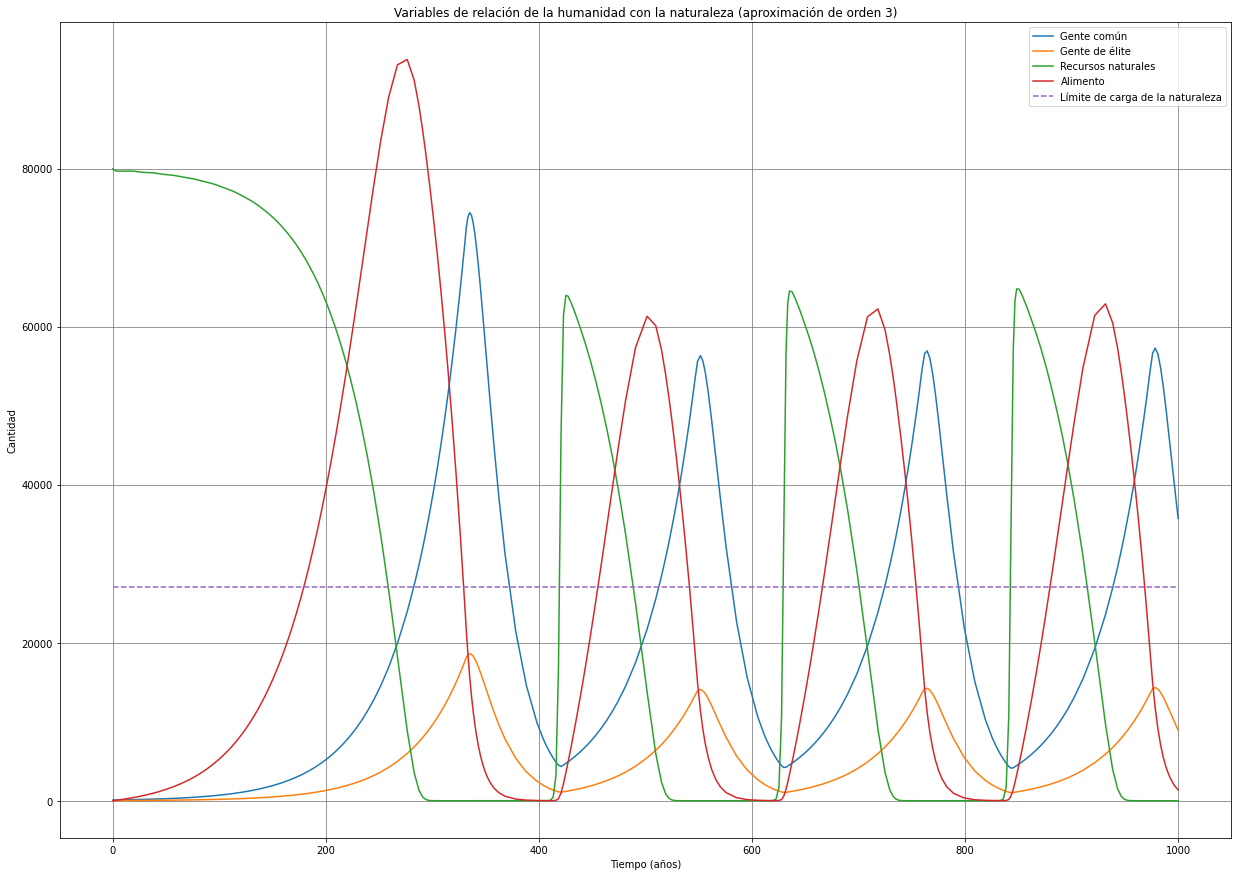

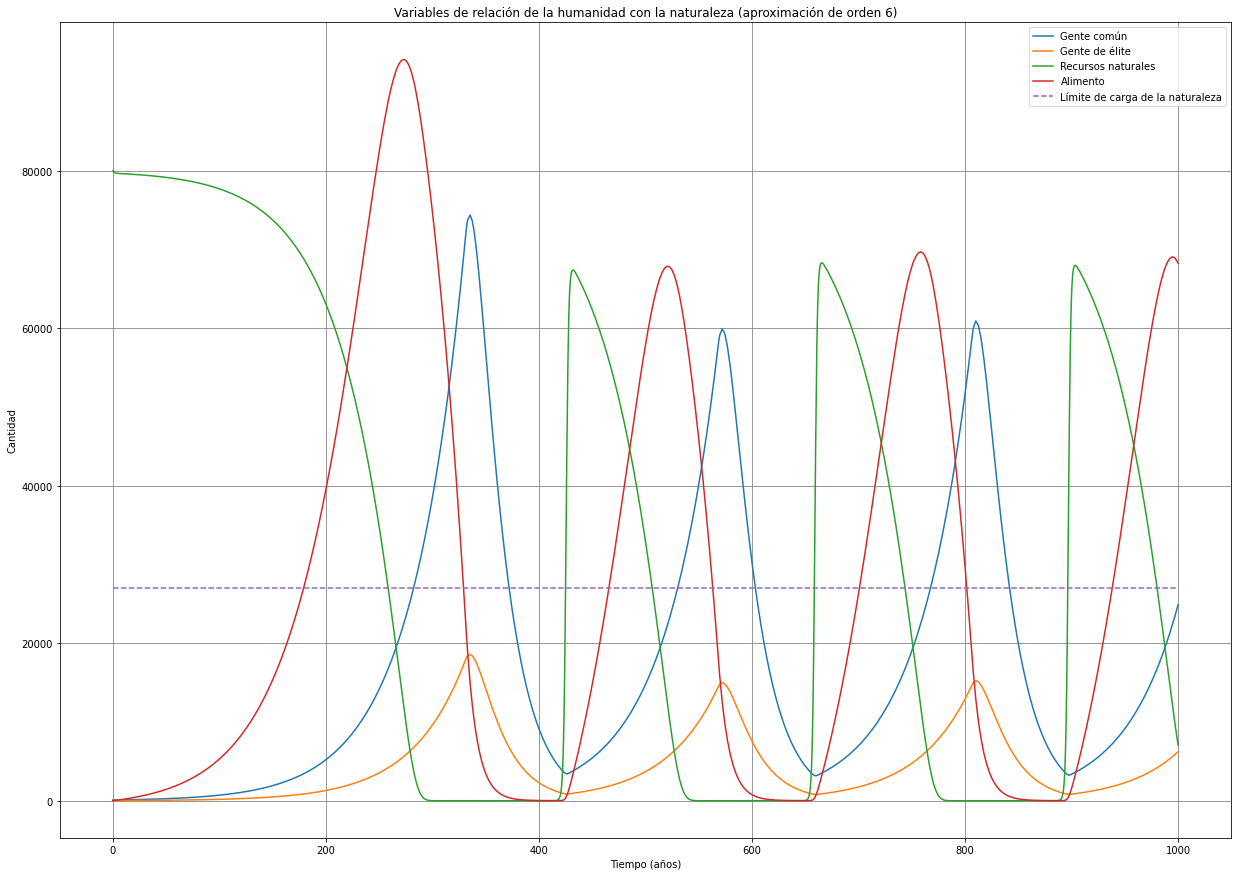

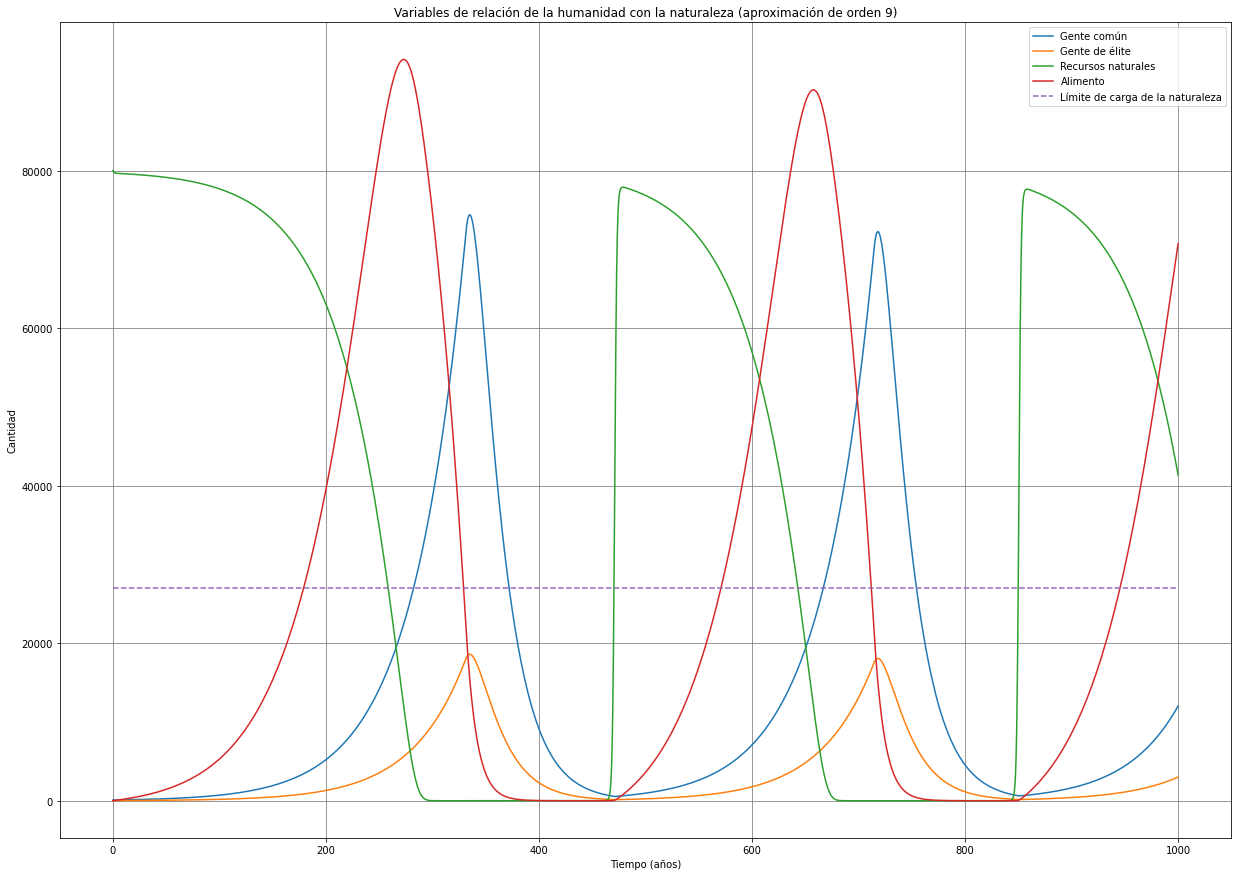

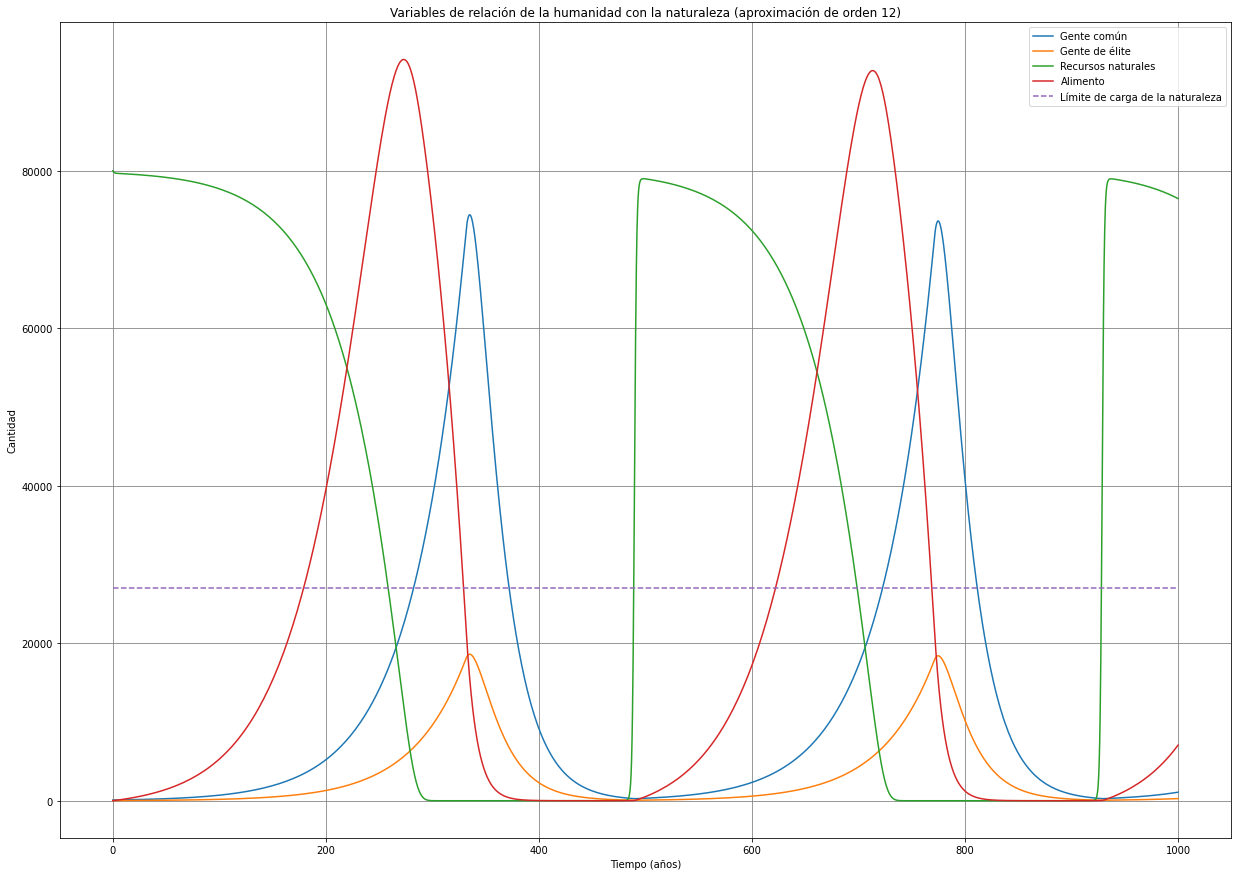

In [34]:
#Parámetros
D_cremilla_barra = 5*D_cremilla
args_5cremilla = [c_b_1, c_b_2, c_a_s, c_s, c_p, k3, c_a_h, c_r, c_L, D_cremilla_barra]

#Creación de las soluciones
sol3_p3 = solve_ivp(F2, (0,1000), X0_cremilla, rtol=10**(-3), args = (args_5cremilla,))
sol4_p3 = solve_ivp(F2, (0,1000), X0_cremilla, rtol=10**(-4), args = (args_5cremilla,))
sol5_p3 = solve_ivp(F2, (0,1000), X0_cremilla, rtol=10**(-5), args = (args_5cremilla,))
sol6_p3 = solve_ivp(F2, (0,1000), X0_cremilla, rtol=10**(-6), args = (args_5cremilla,))
sol7_p3 = solve_ivp(F2, (0,1000), X0_cremilla, rtol=10**(-7), args = (args_5cremilla,))
sol8_p3 = solve_ivp(F2, (0,1000), X0_cremilla, rtol=10**(-8), args = (args_5cremilla,))
sol9_p3 = solve_ivp(F2, (0,1000), X0_cremilla, rtol=10**(-9), args = (args_5cremilla,))
sol10_p3 = solve_ivp(F2, (0,1000), X0_cremilla, rtol=10**(-10), args = (args_5cremilla,))
sol11_p3 = solve_ivp(F2, (0,1000), X0_cremilla, rtol=10**(-11), args = (args_5cremilla,))
sol12_p3 = solve_ivp(F2, (0,1000), X0_cremilla, rtol=10**(-12), args = (args_5cremilla,))

I3_P3, X3_P3 = sol3_p3["t"], sol3_p3["y"]
s3_x_c_p3, s3_x_e_p3, s3_y_p3, s3_a_p3 = X3_P3[0], X3_P3[1], X3_P3[2], X3_P3[3]

I6_P3, X6_P3 = sol6_p3["t"], sol6_p3["y"]
s6_x_c_p3, s6_x_e_p3, s6_y_p3, s6_a_p3 = X6_P3[0], X6_P3[1], X6_P3[2], X6_P3[3]

I9_P3, X9_P3 = sol9_p3["t"], sol9_p3["y"]
s9_x_c_p3, s9_x_e_p3, s9_y_p3, s9_a_p3 = X9_P3[0], X9_P3[1], X9_P3[2], X9_P3[3]

I12_P3, X12_P3 = sol12_p3["t"], sol12_p3["y"]
s12_x_c_p3, s12_x_e_p3, s12_y_p3, s12_a_p3 = X12_P3[0], X12_P3[1], X12_P3[2], X12_P3[3]

#Valor de chi para el D utilizado
chi_barra_p3 = Fchi2(D_cremilla_barra, args_chi_p3)
s3_chi_barra_p3 = np.ones(len(I3_P3))*chi_barra_p3
s9_chi_barra_p3 = np.ones(len(I9_P3))*chi_barra_p3
s6_chi_barra_p3 = np.ones(len(I6_P3))*chi_barra_p3
s12_chi_barra_p3 = np.ones(len(I12_P3))*chi_barra_p3

#Gráfico de orden 3
plt.figure(figsize=(21,15))

plt.plot(I3_P3,s3_x_c_p3, label="Gente común")
plt.plot(I3_P3,s3_x_e_p3, label="Gente de élite")
plt.plot(I3_P3,8*c_L*s3_y_p3, label="Recursos naturales")
plt.plot(I3_P3,c_L*s3_a_p3/2, label="Alimento")
plt.plot(I3_P3,s3_chi_barra_p3, "--", label="Límite de carga de la naturaleza")

plt.title("Variables de relación de la humanidad con la naturaleza (aproximación de orden 3)")

plt.xlabel("Tiempo (años)")
plt.ylabel("Cantidad")

plt.grid(axis = "x", color="gray")
plt.grid(axis = "y", color="gray")

plt.legend()
plt.show()

#Gráfico de orden 6
plt.figure(figsize=(21,15))

plt.plot(I6_P3,s6_x_c_p3, label="Gente común")
plt.plot(I6_P3,s6_x_e_p3, label="Gente de élite")
plt.plot(I6_P3,8*c_L*s6_y_p3, label="Recursos naturales")
plt.plot(I6_P3,c_L*s6_a_p3/2, label="Alimento")
plt.plot(I6_P3,s6_chi_barra_p3, "--", label="Límite de carga de la naturaleza")

plt.title("Variables de relación de la humanidad con la naturaleza (aproximación de orden 6)")

plt.xlabel("Tiempo (años)")
plt.ylabel("Cantidad")

plt.grid(axis = "x", color="gray")
plt.grid(axis = "y", color="gray")

plt.legend()
plt.show()

#Gráfico de orden 9
plt.figure(figsize=(21,15))

plt.plot(I9_P3,s9_x_c_p3, label="Gente común")
plt.plot(I9_P3,s9_x_e_p3, label="Gente de élite")
plt.plot(I9_P3,8*c_L*s9_y_p3, label="Recursos naturales")
plt.plot(I9_P3,c_L*s9_a_p3/2, label="Alimento")
plt.plot(I9_P3,s9_chi_barra_p3, "--", label="Límite de carga de la naturaleza")

plt.title("Variables de relación de la humanidad con la naturaleza (aproximación de orden 9)")

plt.xlabel("Tiempo (años)")
plt.ylabel("Cantidad")

plt.grid(axis = "x", color="gray")
plt.grid(axis = "y", color="gray")

plt.legend()
plt.show()

#Gráfico de orden 12
plt.figure(figsize=(21,15))

plt.plot(I12_P3,s12_x_c_p3, label="Gente común")
plt.plot(I12_P3,s12_x_e_p3, label="Gente de élite")
plt.plot(I12_P3,8*c_L*s12_y_p3, label="Recursos naturales")
plt.plot(I12_P3,c_L*s12_a_p3/2, label="Alimento")
plt.plot(I12_P3,s12_chi_barra_p3, "--", label="Límite de carga de la naturaleza")

plt.title("Variables de relación de la humanidad con la naturaleza (aproximación de orden 12)")

plt.xlabel("Tiempo (años)")
plt.ylabel("Cantidad")

plt.grid(axis = "x", color="gray")
plt.grid(axis = "y", color="gray")

plt.legend()
plt.show()

4. Descripción $\left(con \; 5\~D \,\right)$:

De aquí se puede visualizar que dado que este factor de depredación de la naturaleza aumentó cinco veces, los recursos naturales se disminuyen exponencialmente a cambio de obtener mucha comida, lo que influye también en que la gente común crezca en número considerablemente, aunque la cantidad de gente de élite no en comparación, pues parten siendo menos que la gente común, produciendo que en cierto punto no haya suficiente alimento para sostenerse y entonces empieza a bajar principalmente la población de la gente común, hasta que los recursos naturales vuelven a aumentar y se repite este ciclo una cierta cantidad de veces antes de que en algún momento estas cuatro curvas se estabilicen, solo que se necesitaría extender el tiempo graficado.

#### **Parte 4: Sociedad desigual**
##### <u>1. Definición de parámetros:</u>

In [35]:
D_p4 = (6.35)*(10**(-6))
k4 = 10

##### <u>2. Escribir las EDOs resultantes:</u>
Nos queda el mismo sistema que la parte anterior, es decir:
$$\begin{align*}
x'_C & =b_1x_C-a_1x_C \\
x'_E & =b_2x_E-a_2x_E \\
y' & =ry(L-y)-Dx_cy \\
a' & =Dx_cy-C_C-C_E
\end{align*}$$


##### <u>3. Función del lado derecho:</u>
Dado que estas ecuaciones son las mismas que las de la parte anterior volveremos a usar F2.

##### <u>4. Solución:</u>
1. Primer gráfico:

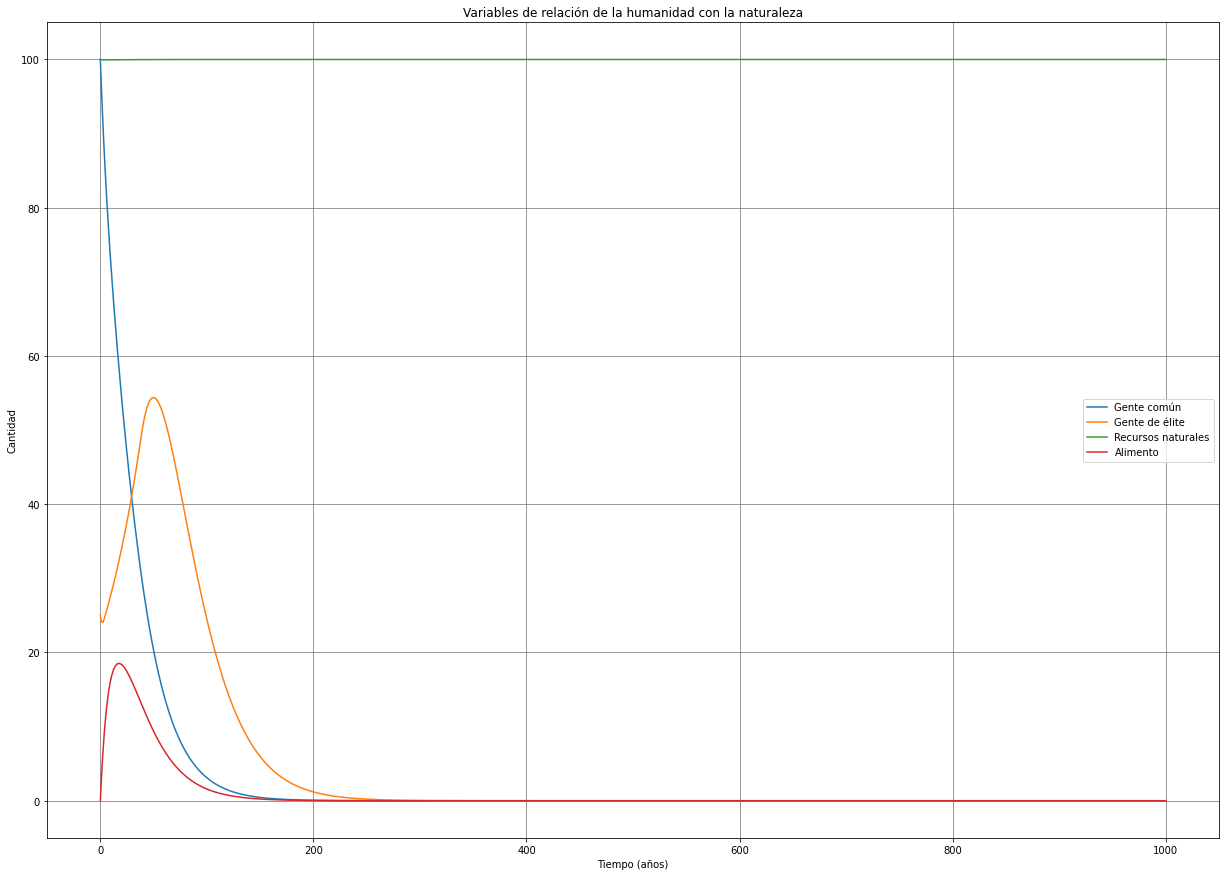

In [37]:
#Parámetros
#Podemos usar el mismo X0_cremilla de la parte anterior pues estos 4 valores iniciales son los mismos para ambas partes
args_p4 = [c_b_1, c_b_2, c_a_s, c_s, c_p, k4, c_a_h, c_r, c_L, D_p4]

#Solución
sol_p4 = solve_ivp(F2, (0,1000), X0_cremilla, rtol=10**(-12), args = (args_p4,))

IP4, XP4 = sol_p4["t"], sol_p4["y"]
sp4_x_c, sp4_x_e, sp4_y, sp4_a = XP4[0], XP4[1], XP4[2], XP4[3]

#Gráfico
plt.figure(figsize=(21,15))

plt.plot(IP4,sp4_x_c, label="Gente común")
plt.plot(IP4,sp4_x_e, label="Gente de élite")
plt.plot(IP4,sp4_y, label="Recursos naturales")
plt.plot(IP4,c_L*sp4_a/2, label="Alimento")

plt.title("Variables de relación de la humanidad con la naturaleza")

plt.xlabel("Tiempo (años)")
plt.ylabel("Cantidad")

plt.grid(axis = "x", color="gray")
plt.grid(axis = "y", color="gray")

plt.legend()
plt.show()

2. Conclusiones:

De aquí se puede observar en primera instancia que como el factor de depredación hacia la naturaleza es tan bajo que la cantidad de recursos naturales se mantiene en equilibrio desde el principio, y luego dado el primer alza de alimento debido a la población inicial, este cae en picado debido al gran aumento en la cantidad de gente de élite la cual come 10 veces más que la gente común, produciendo que el alimento se acabe rápidamente, y por ende, que la población termine desapareciendo.


3. Segundo gráfico:

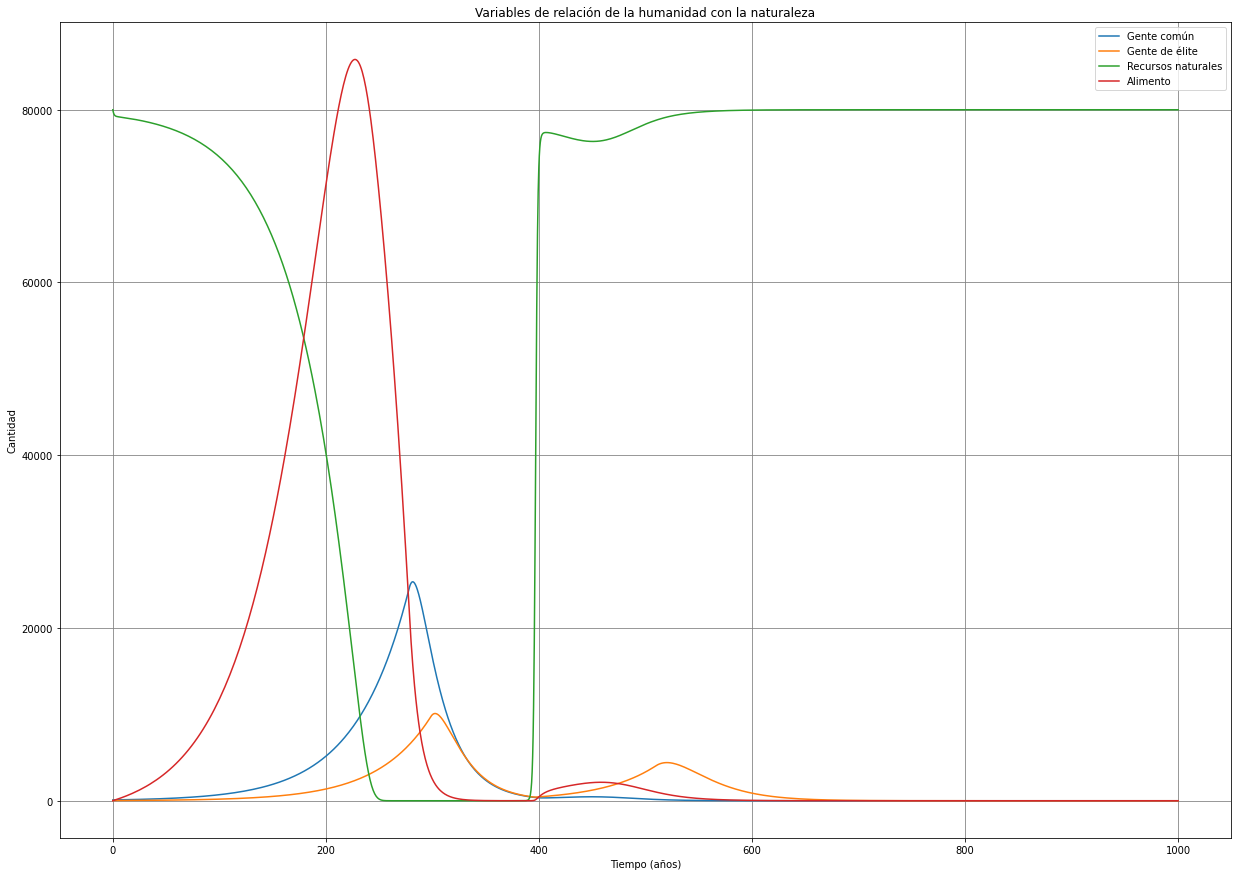

In [38]:
#Parámetros
lastD = 10**(-4)
args_p5 = [c_b_1, c_b_2, c_a_s, c_s, c_p, k4, c_a_h, c_r, c_L, lastD]

#Solución
sol_p5 = solve_ivp(F2, (0,1000), X0_cremilla, rtol=10**(-12), args = (args_p5,))

IP5, XP5 = sol_p5["t"], sol_p5["y"]
sp5_x_c, sp5_x_e, sp5_y, sp5_a = XP5[0], XP5[1], XP5[2], XP5[3]

#Gráfico
plt.figure(figsize=(21,15))

plt.plot(IP5,sp5_x_c, label="Gente común")
plt.plot(IP5,sp5_x_e, label="Gente de élite")
plt.plot(IP5,8*c_L*sp5_y, label="Recursos naturales")
plt.plot(IP5,c_L*sp5_a/2, label="Alimento")

plt.title("Variables de relación de la humanidad con la naturaleza")

plt.xlabel("Tiempo (años)")
plt.ylabel("Cantidad")

plt.grid(axis = "x", color="gray")
plt.grid(axis = "y", color="gray")

plt.legend()
plt.show()

4. Conclusiones:

Ahora que se subió un poco el valor de la depredación, a diferencia del gráfico anterior, los alimentos suben considerablemente más pero eso a su vez produce que los recursos naturales se agoten rápidamente, lo que provoca que la producción de comida se detenga en ese momento y junto con ello la disminución de la población en general, hasta que esta cantidad se vuelve casi cero, si no fuera porque casi en el año 400, como hay tan poca gente los recursos naturales sufren un alza exponencial en un corto período de tiempo, pero esto no resulta ser suficiente pues se puede notar que ahora hay menos gente común que de élite, en contraste a antes de la decaída en la población pues aquí era al revés, y como la gente común es la dedicada a producir alimentos, no dan a basto con lo que consume la élite, produciendo que de nuevo, esta sociedad perezca con el tiempo.